In [193]:
import rebound
import reboundx
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np

In [194]:
sim = rebound.Simulation.from_file("checkpoint.bin")
sim.status()

---------------------------------
REBOUND version:     	3.8.0
REBOUND built on:    	Feb 16 2019 13:25:19
Number of particles: 	10
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.0012031139138280508 y=0.007525083029845546 z=-4.585473565544045e-05 vx=-0.0029729993102272905 vy=0.0005296510080239653 vz=7.697673539713725e-05>
<rebound.Particle object, m=1.6601141530543488e-07 x=0.04767381219827782 y=0.3105308647460608 z=0.020229933289819625 vx=-12.20901232085234 vy=2.0167030252064078 vz=1.2845777138602108>
<rebound.Particle object, m=2.4478382877847715e-06 x=-0.46338318774581866 y=-0.5494811664898438 z=0.018982653742945693 vx=5.630692147663027 vy=-4.751271905448326 vz=-0.39022927670570284>
<rebound.Particle object, m=3.040432648022642e-06 x=-0.9105632499821741 y=0.39870077679954313 z=-6.099054151249327e-05 vx=-2.5885283817872313 vy=-5.795613670899472 vz=0.0003473110

In [195]:
Noutputs = 100000
year = 10000 # One year in units where G=1
times = np.linspace(0.,year, Noutputs)
# x = np.zeros((2,Noutputs))
# y = np.zeros((2,Noutputs))
# z = np.zeros((2,Noutputs))
P_C = np.zeros((Noutputs))
P_E = np.zeros((Noutputs))
x = np.zeros((2,Noutputs))
y = np.zeros((2,Noutputs))
z = np.zeros((2,Noutputs))


In [196]:
sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

for i,time in enumerate(times):
    if i % 10000 ==0:
        print(i)
        print(ps[3].orbit.P)
    sim.integrate(time)
    P_C[i] = ps[5].orbit.P
    P_E[i] = ps[3].orbit.P

0
1.0000033505103132
10000
1.0000070086055526
20000
1.0000411374352385
30000
1.0000067804650665
40000
1.0000249656885607
50000
1.000035848512793
60000
1.0000053950782481
70000
1.0000321534788288
80000
1.0000128781818483
90000
1.000010150705757


In [197]:
sim = rebound.Simulation.from_file("checkpoint.bin")
print(sim.particles[5])
sim.move_to_com()

rebx = reboundx.Extras(sim)

#sim.add("NAME=1986 TO", m=6.537671975029727e-17)#3753 Cruithne
rf = rebx.add("radiation_forces")
#print(sim.particles[5].params)

rf.params["c"] = 63197.8
#sim.add("NAME=1986 TO", m=6.537671975029727e-17)#3753 Cruithne
sim.particles[5].params["beta"] = 10e-10
#sim2.save("radiation.bin")

<rebound.Particle object, m=3.287781142545315e-47 x=0.5434148825598897 y=-0.9364034027348183 z=0.04263616002725609 vx=5.507880166413729 vy=-0.25612052748151487 vz=-1.546260416932923>


In [198]:

# pprint(vars(your_object))

#     x[0][i] = ps[3].x   # Earth This stores the data which allows us to plot it later
#     y[0][i] = ps[3].y
#     z[0][i] = ps[3].z
#     x[1][i] = ps[5].x   # Cruithne
#     y[1][i] = ps[5].y
#     z[1][i] = ps[5].z

In [199]:
 
#rf.params["c"] = 63197.8
##sim.add("NAME=1986 TO", m=6.537671975029727e-17)#3753 Cruithne
#sim.particles[-1].params["beta"] = 0.03
#sim2.save("radiation.bin")



# grain_radius = 5000 # grain radius in m
# print(ps[3].r)
# print(ps[5].r)
# density = 1000. # kg/m^3 = 1g/cc
# Q_pr = 1.
# luminosity = 3.85e26 # Watts
# ps[5].params["beta"] = rebx.rad_calc_beta(6.67e-11, 3e8, 2e30, luminosity, grain_radius, density, Q_pr)
# print("Particle 5's beta parameter = {0}".format(ps[5].params["beta"]))

# ps[5].params["beta"] = rebx.rad_calc_beta(sim.G, rf.params["c"], 1, luminosity, grain_radius/149597870700, density, Q_pr)
# print("Particle 5's beta parameter = {0}".format(ps[5].params["beta"]))

In [200]:

P_C_rad = np.zeros((Noutputs))
P_E_rad = np.zeros((Noutputs))
sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

for i,time in enumerate(times):
    if i % 10000 ==0:
        print(i)
        print(ps[3].orbit.P)
    sim.integrate(time)
    P_C_rad[i] = ps[5].orbit.P
    P_E_rad[i] = ps[3].orbit.P
    x[0][i] = ps[0].x   # Earth This stores the data which allows us to plot it later
    y[0][i] = ps[0].y
    z[0][i] = ps[0].z
    x[1][i] = ps[5].x   # Cruithne
    y[1][i] = ps[5].y
    z[1][i] = ps[5].z

0
1.0000033505103132
10000
1.0000070086055506
20000
1.0000411374352394
30000
1.0000067804650572
40000
1.0000249656885687
50000
1.0000358485127543
60000
1.0000053950782346
70000
1.0000321534788363
80000
1.000012878181885
90000
1.0000101507057884


<IPython.core.display.Javascript object>


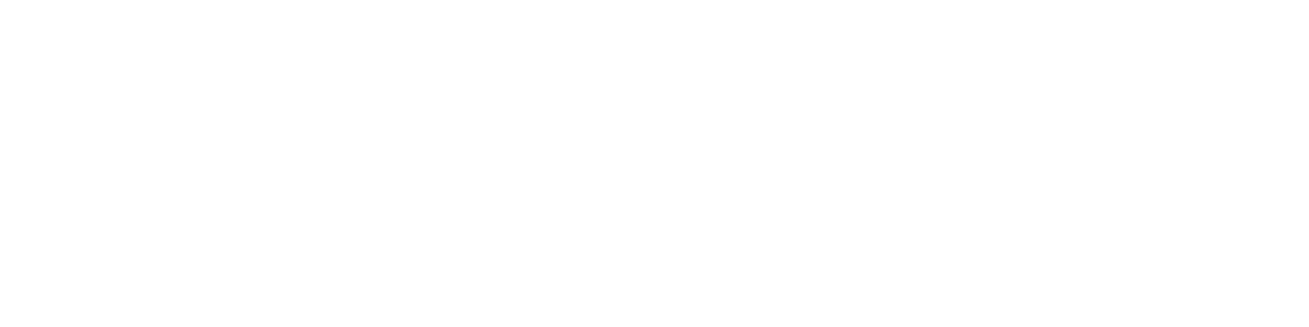

In [201]:
%matplotlib notebook
fig = plt.figure(figsize=(12,3))
ax = plt.subplot(111)
ax.set_xlabel("time [yrs]")
ax.set_ylabel("period [yrs]")
plt.plot(times, P_C);
plt.plot(times, P_E);
plt.plot(times, P_C_rad);
plt.legend(['Cruithne','Earth','Radiation'])

In [202]:
print(np.average(P_C))
print(np.average(P_C_rad))

1.0016313613418246
1.0021184202365474


<IPython.core.display.Javascript object>


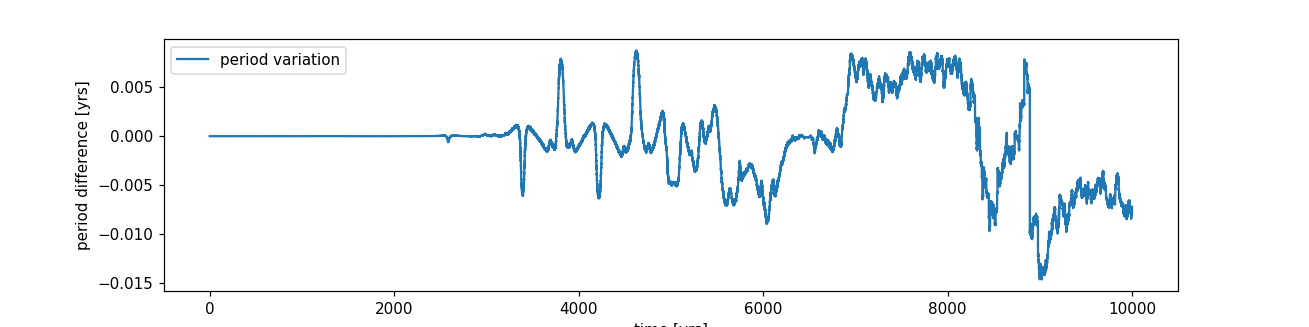

In [203]:
%matplotlib notebook
fig = plt.figure(figsize=(12,3))
ax = plt.subplot(111)
distance = np.sqrt(np.square(x[0]-x[1])+np.square(y[0]-y[1])+np.square(z[0]-z[1]))
ax.set_xlabel("time [yrs]")
ax.set_ylabel("period difference [yrs]")
plt.plot(times, (P_C-P_C_rad));
#plt.plot(times, distance)
plt.legend(['period variation','distance from sun','Radiation'])

In [207]:
print((365)*0.005)

1.825
